# Inverted index dengan TF-IDF KELOMPOK 2



---






## Import Library

In [1]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 3.5 MB/s eta 0:00:00a 0:00:01


In [2]:
import math

import nltk

import operator

from nltk import word_tokenize

stemmer = nltk.stem.PorterStemmer()

In [3]:
# Download the 'punkt' resource

nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
from sentence_transformers import SentenceTransformer, util

/opt/conda/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


## Cleaning and indexing

In [5]:
def clean_tokenize(doc):

    words = word_tokenize(doc.lower())

    return words



def index_one_doc(doc,to_stem):

    '''

    creates dict (tok,positions) for each tok in the document (as term list)

    '''

    tokpos = dict()

    for t_idx,tok in enumerate(doc):
        if to_stem:
           tok = stemmer.stem(tok)
        if tok in tokpos:
            tokpos[tok].append(t_idx)
        else:
            tokpos[tok] = [t_idx]

    return tokpos

##Load Dataset

In [2]:
title

['Peraturan Komnas HAM Nomor 2 Tahun 2019 25',
 'Peraturan Komnas HAM Nomor 2 Tahun 2019 25',
 'Peraturan Komnas HAM Nomor 2 Tahun 2019 26',
 'Peraturan Komnas HAM Nomor 2 Tahun 2019 26',
 'Peraturan Komnas HAM Nomor 2 Tahun 2019 27',
 'Peraturan Komnas HAM Nomor 2 Tahun 2019 27',
 'Peraturan Komnas HAM Nomor 2 Tahun 2019 28',
 'Peraturan Komnas HAM Nomor 2 Tahun 2019 28',
 'Peraturan Komnas HAM Nomor 2 Tahun 2019 29',
 'Peraturan Komnas HAM Nomor 2 Tahun 2019 29',
 'Peraturan Komnas HAM Nomor 2 Tahun 2019 30',
 'Peraturan Komnas HAM Nomor 2 Tahun 2019 30',
 'Peraturan Komnas HAM Nomor 2 Tahun 2019 31',
 'Peraturan Komnas HAM Nomor 2 Tahun 2019 31',
 'Peraturan Komnas HAM Nomor 2 Tahun 2019 32',
 'Peraturan Komnas HAM Nomor 2 Tahun 2019 32',
 'Peraturan Komnas HAM Nomor 2 Tahun 2019 33',
 'Peraturan Komnas HAM Nomor 2 Tahun 2019 33',
 'Peraturan Komnas HAM Nomor 2 Tahun 2019 34',
 'Peraturan Komnas HAM Nomor 2 Tahun 2019 34',
 'Peraturan Komnas HAM Nomor 2 Tahun 2019 35',
 'Peraturan K

In [1]:
import pandas as pd



docs = pd.read_excel("/kaggle/input/dataset-kelompok2/Kelompok2_new.xlsx")


selected_columns = docs[['docs', 'pasal']]


title = selected_columns.apply(lambda row: f"{row['docs']} {row['pasal']}", axis=1).tolist()



docs = docs["tentang"].to_list()

docs = [str(doc) if isinstance(doc, float) else doc for doc in docs]



cleaned_docs = []

for doc in docs:

    print(doc)

    to_app = clean_tokenize(str(doc))

    cleaned_docs.append(to_app)



print(cleaned_docs)

1. Komisi Nasional Hak Asasi Manusia yang selanjutnya 
disebut Komnas HAM adalah lembaga mandiri yang 
kedudukannya setingkat dengan lembaga negara lainnya 
yang berfungsi melaksanakan pengkajian, penelitian, 
penyuluhan, pemantauan, dan mediasi hak asasi 
manusia.
2. Anggota Komnas HAM yang selanjutnya disebut anggota 
adalah orang yang dipilih oleh Dewan Perwakilan Rakyat 
Republik Indonesia berdasarkan usulan Komnas HAM 
dan diresmikan oleh Presiden selaku Kepala Negara.
3. Kepemimpinan kolektif kolegial adalah prinsip kerja 
berbagi tanggung jawab, kewenangan, dan tugas 
profesional secara setara dari seluruh anggota Komnas 
HAM dalam menjalankan tugas pokok dan fungsi 
Komnas HAM
4. Pimpinan Komnas HAM adalah ketua dan 2 (dua) wakil 
ketua Komnas HAM.
5. Kelengkapan Komnas HAM adalah Sidang Paripurna dan 
Subkomisi.
6. Sekretaris Jenderal Komnas HAM adalah seorang 
Aparatur Sipil Negara yang bukan anggota Komnas HAM 
untuk memberikan pelayanan administratif bagi 
pelaksanaan kegia

NameError: name 'clean_tokenize' is not defined

##Stem dan Membuat Dictionary Kosa Kata

In [7]:
inverted_index = dict()
inverted_index_stem = dict()

for d_idx,doc in enumerate(cleaned_docs):

    poslists_s = index_one_doc(doc,to_stem=True) # get positions of each token in the doc
    for tok,poslist_s in poslists_s.items():
        if tok in inverted_index_stem:
            inverted_index_stem[tok][d_idx] = poslist_s # update
        else:
            inverted_index_stem[tok] = dict()
            inverted_index_stem[tok][d_idx] = poslist_s # initialize

    poslists = index_one_doc(doc,to_stem=False)
    for tok,poslist in poslists.items():
        if tok in inverted_index:
            inverted_index[tok][d_idx] = poslist
        else:
            inverted_index[tok] = dict()
            inverted_index[tok][d_idx] = poslist

##Membuat Fungsi Indexing

In [8]:
def at_least_one_unigram(query,inverted_index):

    '''
    returns the indexes of the docs containing *at least one* query unigrams

    the query is a list of unigrams

    '''



    to_return = []

    for unigram in query:

        if unigram in inverted_index:

            to_return.extend(list(inverted_index[unigram].keys()))

    return list(set(to_return))



def all_unigrams(query,inverted_index):

    '''

    returns the indexes of the docs containing *all* query unigrams

    the query is a list of unigrams

    '''



    to_return = []

    for unigram in query:

        if unigram in inverted_index:

            to_return.append(set(list(inverted_index[unigram].keys())))

        else:

            to_return.append(set())

            break

    to_return = to_return[0].intersection(*to_return)

    return list(to_return)



def ngrams(query,inverted_index):

    '''

    returns the indexes of the docs containing all unigrams in same order as the query

    the query is a list of unigrams

    '''

    candidate_docs = all_unigrams(query,inverted_index)



    to_return = []

    for doc in candidate_docs:

        poslists = []

        for unigram in query:

            to_append = inverted_index[unigram][doc]

            if isinstance(to_append, int):

                poslists.append([to_append])

            else:

                poslists.append(to_append)

        # test whether the query words are consecutive

        poslists_sub = [[elt-idx for elt in poslist] for idx,poslist in enumerate(poslists)]

        if set(poslists_sub[0]).intersection(*poslists_sub):

            to_return.append(doc)

    return to_return

##Testing Indexing

In [9]:
query = "Kasus Cuci Uang"

split_query = query.split()

query_stemmed = [stemmer.stem(elt) for elt in split_query]

print(at_least_one_unigram(query_stemmed,inverted_index))

[162]


###Training

In [2]:
import pandas as pd

# Load dataset
df = pd.read_excel("/kaggle/input/dataset-kelompok2/Kelompok2_new.xlsx")

# Ensure labels are in float format for similarity tasks
df['label'] = df['label'].astype(float)

In [5]:
df

,docs,pasal,tentang,query,label
0,Peraturan Komnas HAM Nomor 2 Tahun 2019,25,1. Komisi Nasional Hak Asasi Manusia yang sela...,Kewenangan Kepemimpinan kolektif kolegial,1.0
1,Peraturan Komnas HAM Nomor 2 Tahun 2019,25,1. Komisi Nasional Hak Asasi Manusia yang sela...,Hukum kasus penipuan online,0.0
2,Peraturan Komnas HAM Nomor 2 Tahun 2019,26,(1) Komisi Nasional Hak Asasi Manusia yang sel...,Komnas HAM setingkat dengan lembaga lainnya,1.0
3,Peraturan Komnas HAM Nomor 2 Tahun 2019,26,(1) Komisi Nasional Hak Asasi Manusia yang sel...,Pasal pencucian uang terhadap perusahaan,0.0
4,Peraturan Komnas HAM Nomor 2 Tahun 2019,27,(1) Apabila Ketua Komnas HAM meninggal atau be...,prosedur pemilihan dan penetapan Ketua penggan...,1.0
...,...,...,...,...,...
175,Peraturan Komnas HAM Nomor 6 Tahun 2020,4,Bentuk dan susunan JRA Komnas HAM sebagaimana ...,Bentuk dan susunan Jadwal Retensi Arsip (JRA) ...,1.0
176,Peraturan Komnas HAM Nomor 6 Tahun 2020,5,(1) Penentuan masa retensi arsip dihitung seja...,Penentuan masa retensi arsip dimulai sejak keg...,1.0
177,Peraturan Komnas HAM Nomor 6 Tahun 2020,6,Keterangan tentang penetapan suatu jenis arsip...,Penetapan arsip: a) Dinilai kembali jika berpo...,1.0
178,Peraturan Komnas HAM Nomor 6 Tahun 2020,7,JRA Komnas HAM sebagaimana dimaksud dalam Pasa...,JRA Komnas HAM tercantum dalam Lampiran dan me...,1.0


In [1]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModel, AdamW
import torch
import torch.nn.functional as F
from torch import nn
from tqdm import tqdm
from torch.nn.functional import cosine_similarity
import numpy as np

# Set the device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model and tokenizer from HuggingFace Hub, and move model to device
tokenizer = AutoTokenizer.from_pretrained("indolem/indobert-base-uncased")
model = AutoModel.from_pretrained("indolem/indobert-base-uncased").to(device)
model.load_state_dict(torch.load('/kaggle/working/2_lossvalid0.02850815818263226.pth'))

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/234k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

/tmp/ipykernel_30/3500810494.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/kaggle/working/2_lossvalid0.02850815818263226.pth'))


<All keys matched successfully>

In [36]:
new_ds = load_dataset("genta-tech/squad_pairs_indo")

README.md:   0%|          | 0.00/746 [00:00<?, ?B/s]

(…)-00000-of-00001-dfbd22e636198aff.parquet:   0%|          | 0.00/8.15M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

In [37]:
train_new_pair = new_ds['train'].select(range(43000))
train_new_pair = train_new_pair.rename_column('0', 'sentence1')
train_new_pair = train_new_pair.rename_column('1', 'sentence2')
train_new_pair = train_new_pair.add_column('score', np.ones(len(train_new_pair), dtype=np.float64))

train_new_npair = new_ds['train'].select(range(43000, 86000))
train_new_npair = train_new_npair.rename_column('0', 'sentence1')
train_new_npair = train_new_npair.rename_column('1', 'sentence2')
train_new_npair = train_new_npair.add_column('score', np.zeros(len(train_new_pair), dtype=np.float64))

In [38]:
# Geser kolom 'sentence2' ke bawah sejauh 10 baris
shift_amount = 10
column_1 = train_new_npair['sentence2']
column_2 = train_new_npair['score']

# Geser kolom dengan mengambil bagian akhir dan menempelkannya ke bagian awal
shuffled_column_1 = column_1[-shift_amount:] + column_1[:-shift_amount]

# Buat dataset baru dengan kolom 'sentence2' yang sudah digeser
train_new_npair = train_new_npair.remove_columns(['sentence2', 'score'])
train_new_npair = train_new_npair.add_column('sentence2', shuffled_column_1)
train_new_npair = train_new_npair.add_column('score', column_2)

In [39]:
from datasets import load_dataset, concatenate_datasets
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Load the dataset
ds = load_dataset("quarkss/stsb-indo-mt")

# Split the dataset
# Round the scores in the train dataset
train_data = concatenate_datasets([ds['train'], ds['test'],ds['validation'],train_new_pair,train_new_npair])
train_data = train_data.shuffle(seed=42) 
train_data = train_data.select(range(int(len(train_data) * 0.9)))
train_data = train_data.map(lambda example: {"score": 1 if example['score'] > 0.5 else 0})

# Round the scores in the validation dataset
valid_data = train_data.select(range(int(len(train_data) * 0.9), len(train_data)))
valid_data = valid_data.map(lambda example: {"score": 1 if example['score'] > 0.5 else 0})

# Custom dataset class
class TextPairDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=128):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sentence1 = self.data[idx]['sentence1']
        sentence2 = self.data[idx]['sentence2']
        score = self.data[idx]['score']
        
        return {
            'sentence1': sentence1,
            'sentence2': sentence2,
            'score': torch.tensor(score, dtype=torch.float)
        }

# Create datasets
train_dataset = TextPairDataset(train_data, tokenizer)
valid_dataset = TextPairDataset(valid_data, tokenizer)

README.md:   0%|          | 0.00/1.75k [00:00<?, ?B/s]

data/stsb.train.csv:   0%|          | 0.00/855k [00:00<?, ?B/s]

data/stsb.validation.csv:   0%|          | 0.00/242k [00:00<?, ?B/s]

data/stsb.test.csv:   0%|          | 0.00/193k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5749 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1379 [00:00<?, ? examples/s]

Map:   0%|          | 0/85165 [00:00<?, ? examples/s]

Map:   0%|          | 0/8517 [00:00<?, ? examples/s]

In [42]:
# Create dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=24, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=24, shuffle=False)

In [43]:
class CustomCosineLoss(nn.Module):
    def __init__(self):
        super(CustomCosineLoss, self).__init__()

    def forward(self, embeddings1, embeddings2, label, margin=0.5):
        cosine_sim = F.cosine_similarity(embeddings1, embeddings2)
        loss = torch.mean((label * (1 - cosine_sim)) + ((1 - label) * F.relu(cosine_sim - margin)))
        return loss

class contrastive_loss(nn.Module):
    def __init__(self):
        super(contrastive_loss, self).__init__()

    def forward(self, embedding_a, embedding_b, label, margin=0.5):
        cosine_sim = F.cosine_similarity(embedding_a, embedding_b)
        print(label)
        print(cosine_sim)
        positive_loss = label * (1 - cosine_sim)
        negative_loss = (1 - label) * F.relu(cosine_sim - margin)
        loss = torch.mean(positive_loss + negative_loss)
        return loss

In [ ]:
# Initialize the custom loss
CosineLoss = CustomCosineLoss()
ContrastiveLoss = contrastive_loss()
# cross_entropy_loss = nn.CrossEntropyLoss()

# Set up optimizer for the model
optimizer = AdamW(params=model.parameters(), lr=2e-5, correct_bias=True, weight_decay=0.01)

# Mean Pooling - Take average of all tokens
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output.last_hidden_state
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

# Encode text
def encode(texts):
    # Tokenize sentences
    encoded_input = tokenizer(texts, padding=True, truncation=True, max_length=512, return_tensors='pt').to(device)

    # Compute token embeddings
    model_output = model(**encoded_input, return_dict=True)

    # Perform pooling
    embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

    # Normalize embeddings
    embeddings = F.normalize(embeddings, p=2, dim=1)
    
    return embeddings.to(device)  # Ensure embeddings are on the correct device

# Custom Training Loop
num_epochs = 20
loss_before = 100
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in tqdm(train_dataloader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False):
        # Prepare batch data
        sentences1_batch = batch['sentence1']
        sentences2_batch = batch['sentence2']
        labels_batch = batch['score'].to(device)

        optimizer.zero_grad()  # Clear the gradients from the previous step
        # Encode sentences and ensure embeddings are on the correct device
        embeddings_a = encode(sentences1_batch)
        embeddings_b = encode(sentences2_batch)

        # Compute the loss
        # loss = custom_loss(sentences1_batch_tensor, sentences2_batch_tensor, labels_batch)
        # loss = cross_entropy_loss(scores, labels_batch)

        loss = CosineLoss(embeddings_a, embeddings_b, labels_batch)
        total_loss += loss.item()

        # Backpropagation
        loss.backward()  # Compute gradient
        optimizer.step()  # Update the model's parameters

    # Print the average loss for this epoch
    avg_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch+1} Average Training Loss: {avg_loss}')

    # Evaluate on validation set
    model.eval()
    total_loss = 0
    for batch in valid_dataloader:
        # Prepare batch data
        sentences1_batch = batch['sentence1']
        sentences2_batch = batch['sentence2']
        labels_batch = batch['score'].to(device)
        with torch.no_grad():
            # Encode sentences and ensure embeddings are on the correct device
            embeddings_a = encode(sentences1_batch)
            embeddings_b = encode(sentences2_batch)
    
            # Compute loss
            # scores = torch.mm(embeddings_a, embeddings_b.transpose(0, 1)) * 1
            # labels_batch = labels_batch.long()
            # loss = (cross_entropy_loss(scores, labels_batch) + cross_entropy_loss(scores.transpose(0, 1), labels_batch)) / 2
            loss = CosineLoss(embeddings_a, embeddings_b, labels_batch)
            total_loss += loss.item()

    # Print the average loss for this epoch
    avg_loss = total_loss / len(valid_dataloader)
    print(f'Epoch {epoch+1} Average Validation Loss: {avg_loss}')
    if loss_before > avg_loss:
        torch.save(model.state_dict(), f"{epoch+1}_lossvalid{avg_loss}.pth")
        loss_before = avg_loss

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1 Average Training Loss: 0.11790247289908021
Epoch 1 Average Validation Loss: 0.04683647383279889


Epoch 2/20:  20%|██        | 719/3549 [05:07<19:47,  2.38it/s]

In [3]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

#Mean Pooling - Take average of all tokens
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output.last_hidden_state
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


#Encode text
def encode(texts):
    # Tokenize sentences
    encoded_input = tokenizer(texts, padding=True, truncation=True, max_length=512, return_tensors='pt').to(device)

    # Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input, return_dict=True)

    # Perform pooling
    embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

    # Normalize embeddings
    embeddings = F.normalize(embeddings, p=2, dim=1)
    
    return embeddings


# Sentences we want sentence embeddings for
query = "Peraturan HAM"
docs = ["Seekor beruang kutub meluncur di atas salju.", "dia pencuri yang handal", "saya suka ice cream"]
doc_str = df['tentang'].tolist()
docs = doc_str

#Encode query and docs
query_emb = encode(query)
doc_emb = encode(docs)

#Compute dot score between query and all document embeddings
scores = torch.mm(query_emb, doc_emb.transpose(0, 1))[0].cpu().tolist()

#Combine docs & scores
doc_score_pairs = list(zip(docs, scores))

#Sort by decreasing score
doc_score_pairs = sorted(doc_score_pairs, key=lambda x: x[1], reverse=True)

#Output passages & scores
for doc, score in doc_score_pairs:
    print(score, doc)

0.7534776926040649 Materi muatan Renstra Komnas HAM yang diatur dalam
Peraturan ini telah melalui tahap penelaahan dan
persetujuan dari Kementerian Perencanaan/
Pembangunan Nasional/Kepala Badan Perencanaan
Pembangunan Nasional.
0.7524193525314331 Pada saat Peraturan Komisi ini mulai berlaku, Peraturan
Ketua Komisi Nasional Hak Asasi Manusia Nomor
001A/KETUA.SK/III/2015 Tahun 2015-2019 dicabut dan
dinyatakan tidak berlaku.
0.7196916341781616 (1) Komisi Nasional Hak Asasi Manusia yang selanjutnya 
disebut Komnas HAM adalah lembaga mandiri yang 
kedudukannya setingkat dengan lembaga negara lainnya.
(2) Anggota Komnas HAM adalah pejabat setingkat dengan 
pejabat lembaga negara lainnya.
0.7196916341781616 (1) Komisi Nasional Hak Asasi Manusia yang selanjutnya 
disebut Komnas HAM adalah lembaga mandiri yang 
kedudukannya setingkat dengan lembaga negara lainnya.
(2) Anggota Komnas HAM adalah pejabat setingkat dengan 
pejabat lembaga negara lainnya.
0.7196370363235474 Rencana Strategis Komisi

180
[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
180
tensor([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.,

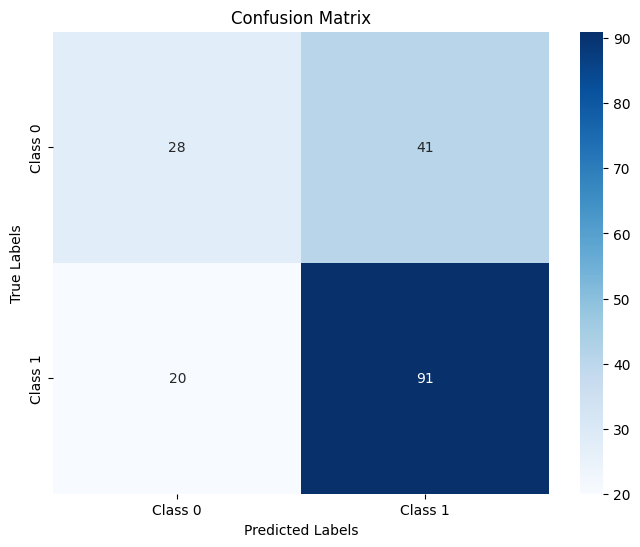

In [34]:
import torch
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

query_str = df['query'].tolist()
doc_str = df['tentang'].tolist()
predictions = []

# Langkah 1: Encode query dan dokumen
for i in range(len(query_str)):
    predictions.append(torch.mm(encode(str(query_str[i])), encode(str(doc_str[i])).transpose(0, 1)))

# Convert predictions to tensor
predictions = torch.stack(predictions)
predictions = predictions.cpu()
predictions = (predictions >= 0.5).float()

# Langkah 4: Hitung F1-score
true_labels = df['label'].tolist()  # Label yang benar dari dataframe

print(len(true_labels))
print(true_labels)
print(len(predictions))
print(predictions.flatten())

# Calculate F1-score
f1 = f1_score(true_labels, predictions.flatten(), average='weighted')
print("F1-score:", f1)

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions.flatten())

# Print confusion matrix details
tn, fp, fn, tp = cm.ravel()  # unpacking values for confusion matrix
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Precision, Recall, and F1 Score per class
precision = precision_score(true_labels, predictions.flatten(), average='weighted')
recall = recall_score(true_labels, predictions.flatten(), average='weighted')
print("Precision (weighted):", precision)
print("Recall (weighted):", recall)

# Full classification report
report = classification_report(true_labels, predictions.flatten())
print("\nClassification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()